# 什么是逻辑回归

### $\hat{p}=f(x)$ 

### $ \hat{y}= \begin{cases} 1, & \hat{p}\geq0.5 \\ 0, & \hat{p}\leq 0.5 \end{cases} $

逻辑回归既可以看作回归算法，也可以看作分类算法。通常解决分类问题（二分类）。

### Sigmoid函数

### $\hat{p}=\sigma(\theta^T\cdot x_b)$

### $\sigma(t)=\frac1{1+e^{-t}}$

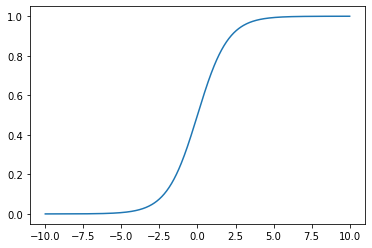

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(t):
    return 1 / (1 + np.exp(-t))

x = np.linspace(-10, 10, 500)
y = sigmoid(x)

plt.plot(x, y)
plt.show()

值域在(0, 1)

t > 0, p > 0.5

t < 0, p < 0.5

## 损失函数

### $ cost = \begin{cases} \text{如果y=1，p越小，cost越大} \\ \text{如果y=0，p越大，cost越大} \end{cases}$

### $cost = \begin{cases} -log({\hat{p}}) &\text{if y=1} \\ -log(1-{\hat{p}}) &\text{if y=0} \end{cases}$

### $cost =-ylog({\hat{p}})-(1-y)log(1-{\hat{p}})$

## 决策边界

通过一条直线将特征分布空间分为两部分。

为了更好的描述决策边界，引入多项式项。

In [7]:
def plot_decision_boundary(model):
 
    # 设定最大最小值，附加一点点边缘填充
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
 
    # 用预测函数预测一下
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
 
    # 然后画出图
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

# sklearn中的逻辑回归

In [4]:
#生成测试用例

np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array(X[:, 0] ** 2 + X[:, 1] < 1.5, dtype='int')
for _ in range(20):
    y[np.random.randint(200)] = 1

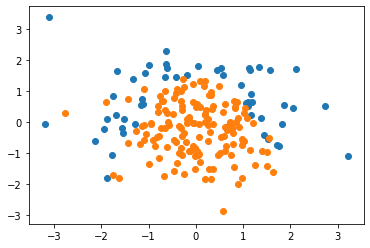

In [5]:
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [8]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
log_reg.score(X_train, y_train)

0.7933333333333333

In [11]:
log_reg.score(X_test, y_test)

0.86

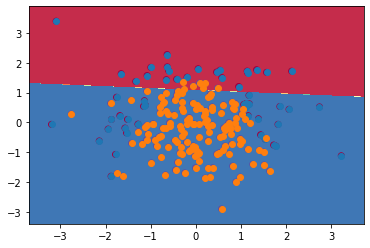

In [12]:
plot_decision_boundary(log_reg)
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

### 引入多项式逻辑回归

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler',StandardScaler()),
        ('log_reg',LogisticRegression())
    ])

In [14]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [15]:
poly_log_reg.score(X_train, y_train)

0.9066666666666666

In [16]:
poly_log_reg.score(X_test, y_test)

0.94

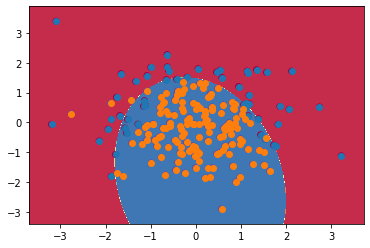

In [17]:
plot_decision_boundary(poly_log_reg)
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

### 过拟合

In [18]:
poly_log_reg = PolynomialLogisticRegression(degree=20)
poly_log_reg.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=20, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [19]:
poly_log_reg.score(X_train, y_train)

0.94

In [20]:
poly_log_reg.score(X_test, y_test)

0.92

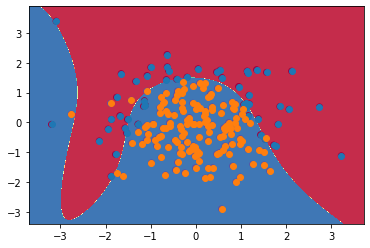

In [21]:
plot_decision_boundary(poly_log_reg)
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

### 引入正则项

In [22]:
def PolynomialLogisticRegression(degree, C):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler',StandardScaler()),
        ('log_reg',LogisticRegression(C=C))
    ])

In [23]:
poly_log_reg = PolynomialLogisticRegression(degree=20, C=0.1)
poly_log_reg.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=20, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=0.1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [24]:
poly_log_reg.score(X_train, y_train)

0.84

In [25]:
poly_log_reg.score(X_test, y_test)

0.92

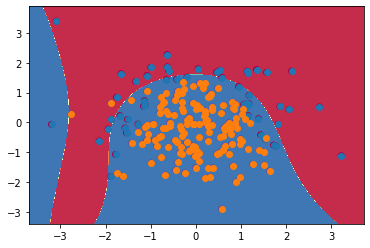

In [26]:
plot_decision_boundary(poly_log_reg)
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

# 将二分类算法应用于多分类问题

OvR算法(One vs Rest)，对于n个类别进行n次二分类。

OvO算法(One vs One)，对n个类别进行C(n,2)次分类，选择票数最高的分类。

In [50]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [38]:
log_reg = LogisticRegression() #默认 OvO
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
log_reg.score(X_test, y_test)

0.7894736842105263

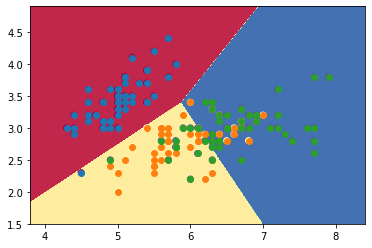

In [40]:
plot_decision_boundary(log_reg)
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 2, 0], X[y == 2, 1])
plt.show()

In [52]:
log_reg = LogisticRegression(multi_class="ovr") #调用 OvR
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
log_reg.score(X_test, y_test)

0.7894736842105263

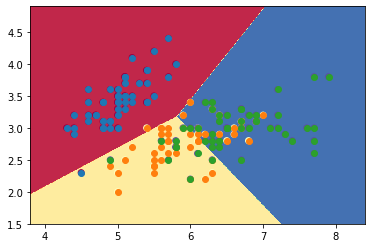

In [54]:
plot_decision_boundary(log_reg)
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 2, 0], X[y == 2, 1])
plt.show()

### 使用鸢尾花所有数据

In [55]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

1.0

In [56]:
log_reg = LogisticRegression(multi_class="ovr")
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9736842105263158

## OvO和OvR

In [58]:
from sklearn.multiclass import OneVsRestClassifier

ovr = OneVsRestClassifier(log_reg)
ovr.fit(X_train, y_train)
ovr.score(X_test, y_test)

0.9736842105263158

In [59]:
from sklearn.multiclass import OneVsOneClassifier

ovo = OneVsOneClassifier(log_reg)
ovo.fit(X_train, y_train)
ovo.score(X_test, y_test)

1.0